In [6]:
# Importazione delle librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Caricamento del dataset CIFAR-10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"Forma dei dati di addestramento: {X_train.shape}")
print(f"Forma delle etichette di addestramento: {y_train.shape}")
print(f"Forma dei dati di test: {X_test.shape}")
print(f"Forma delle etichette di test: {y_test.shape}")


# 2. Riduci le etichette da 2D a 1D per poterle usare con Scikit-Learn
y_train = y_train.flatten()
y_test = y_test.flatten()


# 3. Sottocampionamento casuale stratificato per ridurre il dataset (20%)
X_train_rid, _, y_train_rid, _ = train_test_split(
    X_train, y_train, 
    train_size=0.2,  # Riduci il dataset al 20%
    stratify=y_train, 
    random_state=42
)

X_test_rid, _, y_test_rid, _ = train_test_split(
    X_test, y_test, 
    train_size=0.2,  # Riduci il dataset al 20%
    stratify=y_test, 
    random_state=42
)


# 4. Riduci le dimensioni da 3D (32, 32, 3) a 2D (1024, 3) per i modelli classici
X_train_rid = X_train_rid.reshape((X_train_rid.shape[0], -1))
X_test_rid = X_test_rid.reshape((X_test_rid.shape[0], -1))

print(f"Forma dei dati di addestramento ridotti: {X_train_rid.shape}")
print(f"Forma delle etichette di addestramento ridotte: {y_train_rid.shape}")
print(f"Forma dei dati di test ridotti: {X_test_rid.shape}")
print(f"Forma delle etichette di test ridotte: {y_test_rid.shape}")


# 5. Standardizza i dati per evitare che valori più grandi influenzino il training dei modelli
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rid)
X_test_scaled = scaler.transform(X_test_rid)


Forma dei dati di addestramento: (50000, 32, 32, 3)
Forma delle etichette di addestramento: (50000, 1)
Forma dei dati di test: (10000, 32, 32, 3)
Forma delle etichette di test: (10000, 1)
Forma dei dati di addestramento ridotti: (10000, 3072)
Forma delle etichette di addestramento ridotte: (10000,)
Forma dei dati di test ridotti: (2000, 3072)
Forma delle etichette di test ridotte: (2000,)


I migliori parametri per Logistic Regression sono: {'C': 0.1, 'max_iter': 100}
I migliori parametri per SVM sono: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
I migliori parametri per KNN sono: {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
I migliori parametri per Decision Tree sono: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy di Logistic Regression: 0.3195

Report di classificazione di Logistic Regression:

              precision    recall  f1-score   support

           0       0.39      0.42      0.40       200
           1       0.38      0.35      0.36       200
           2       0.26      0.23      0.24       200
           3       0.21      0.23      0.22       200
           4       0.33      0.32      0.32       200
           5       0.20      0.17      0.18       200
           6       0.32      0.34      0.33       200
           7       0.35      0.32      0.33       200
           8       0.39      0.48      0.43       200
 

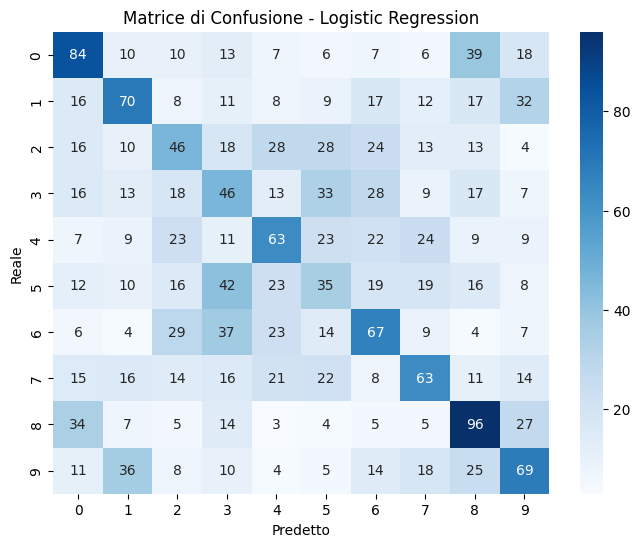

Accuracy di SVM: 0.462

Report di classificazione di SVM:

              precision    recall  f1-score   support

           0       0.51      0.56      0.53       200
           1       0.55      0.57      0.56       200
           2       0.35      0.34      0.35       200
           3       0.29      0.33      0.31       200
           4       0.42      0.40      0.41       200
           5       0.39      0.36      0.38       200
           6       0.50      0.49      0.49       200
           7       0.50      0.42      0.46       200
           8       0.60      0.64      0.62       200
           9       0.49      0.51      0.50       200

    accuracy                           0.46      2000
   macro avg       0.46      0.46      0.46      2000
weighted avg       0.46      0.46      0.46      2000



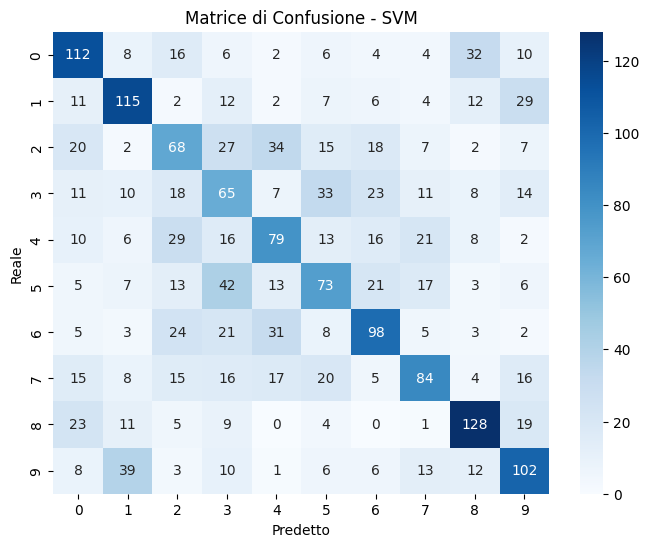

Accuracy di KNN: 0.3675

Report di classificazione di KNN:

              precision    recall  f1-score   support

           0       0.39      0.54      0.45       200
           1       0.49      0.33      0.39       200
           2       0.27      0.18      0.22       200
           3       0.26      0.28      0.27       200
           4       0.28      0.39      0.33       200
           5       0.35      0.36      0.36       200
           6       0.36      0.38      0.37       200
           7       0.59      0.24      0.35       200
           8       0.40      0.62      0.48       200
           9       0.47      0.36      0.41       200

    accuracy                           0.37      2000
   macro avg       0.39      0.37      0.36      2000
weighted avg       0.39      0.37      0.36      2000



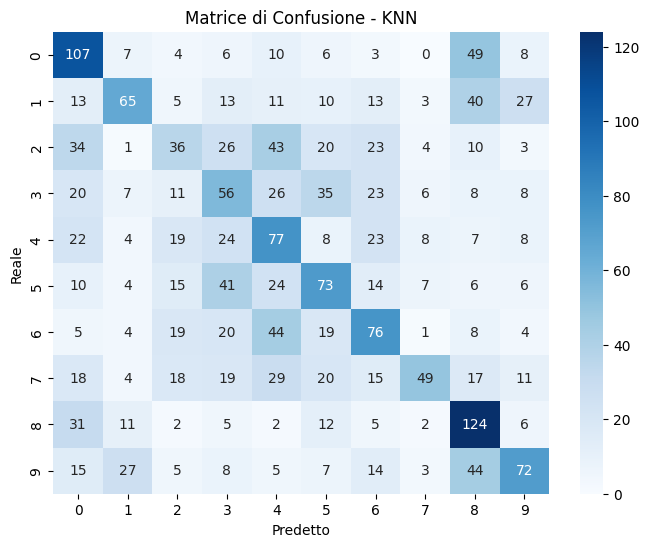

Accuracy di Decision Tree: 0.2465

Report di classificazione di Decision Tree:

              precision    recall  f1-score   support

           0       0.31      0.38      0.34       200
           1       0.25      0.24      0.24       200
           2       0.16      0.12      0.14       200
           3       0.18      0.18      0.18       200
           4       0.21      0.27      0.23       200
           5       0.24      0.14      0.17       200
           6       0.27      0.33      0.29       200
           7       0.22      0.22      0.22       200
           8       0.32      0.32      0.32       200
           9       0.29      0.28      0.28       200

    accuracy                           0.25      2000
   macro avg       0.24      0.25      0.24      2000
weighted avg       0.24      0.25      0.24      2000



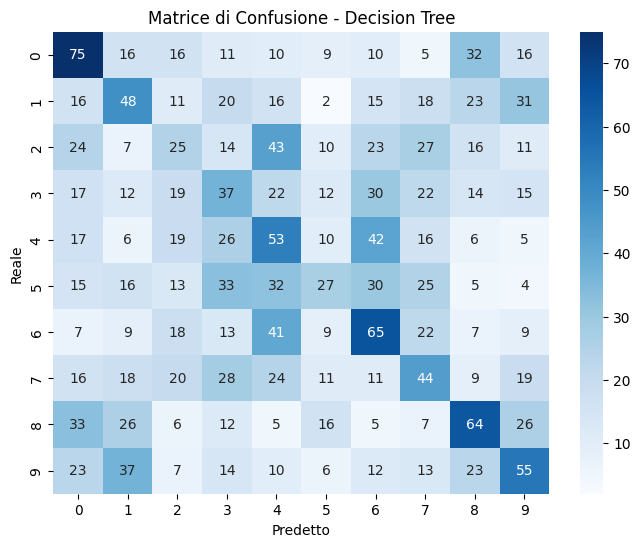

In [8]:
# 6. Definisci i modelli da testare
modelli = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=42))
]

# 7. Definisci la griglia degli iperparametri per ciascun modello
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'max_iter': [100, 1000],
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine'],
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
}

# 8. Esegui GridSearchCV per ciascun modello e seleziona i migliori
grid_searches = []
for nome, modello in modelli:
    grid_search = GridSearchCV(modello, param_grid[nome], cv=5, scoring='accuracy', n_jobs=-1)
    grid_searches.append((nome, grid_search))

# 9. Esegui l'allenamento e trova i migliori modelli e parametri
best_models = {}
for nome, grid_search in grid_searches:
    grid_search.fit(X_train_scaled, y_train_rid)
    best_models[nome] = grid_search.best_estimator_
    print(f"I migliori parametri per {nome} sono: {grid_search.best_params_}")

# 10. Valutazione dei modelli sui dati di test
for nome, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_rid, y_pred)
    print(f"Accuracy di {nome}: {accuracy}")
    print(f"\nReport di classificazione di {nome}:\n")
    print(classification_report(y_test_rid, y_pred))

    # Matrice di confusione
    cm = confusion_matrix(y_test_rid, y_pred, labels=best_model.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.title(f'Matrice di Confusione - {nome}')
    plt.xlabel('Predetto')
    plt.ylabel('Reale')
    plt.show()
